In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df = pd.read_csv('train.M.csv')
test_df = pd.read_csv('test.M.csv')
print('Number of Rows and Columns in Training Dataset:',train_df.shape)
print('Number of Rows and Columns in Testing Dataset:',test_df.shape)

Number of Rows and Columns in Training Dataset: (4209, 378)
Number of Rows and Columns in Testing Dataset: (4209, 377)


In [3]:
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [4]:
print('Columns with object datatype: ')
print(train_df.select_dtypes(np.object).columns)

Columns with object datatype: 
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [5]:
print('Columns with float datatype: ')
print(train_df.select_dtypes(np.float).columns)

Columns with float datatype: 
Index(['y'], dtype='object')


# Checking if there is any column(s) with zero variance. 
## If there is any column with zero variance, we will remove those coulmns. 
### Variance of the column will be zero, if the there is constant value(all rows of the column will have same value) in the column.
#### We will take standard deviation of the columns and squaring the standard deviation will give Variance (Variance = (Standard Deviation)^2). 


In [6]:
train_df.drop(columns={'ID','y'})
test_df.drop(columns={'ID'})
variance = pow(train_df.drop(columns={'ID','y'}).std(),2)
df=pd.DataFrame(variance).reset_index().rename(columns={'index':'index', 0:'Variance'})
print('Following are the columns with Zero variance')
df_Var=df[df['Variance']==0]
df_Var



Following are the columns with Zero variance


,index,Variance
1,X11,0.0
81,X93,0.0
95,X107,0.0
217,X233,0.0
219,X235,0.0
252,X268,0.0
273,X289,0.0
274,X290,0.0
277,X293,0.0
281,X297,0.0


In [7]:
print('Number of columns with zero variance is',df_Var['index'].count())
df_Var['index'].values

Number of columns with zero variance is 12


array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [8]:
Columns_to_drop=df_Var['index'].values
Columns_to_drop

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

### We will drop columns with zero variance in testing and training dataset

In [9]:
for df in [train_df, test_df]:
    df.drop(columns = Columns_to_drop,inplace=True)

print('Shape of the training dataset after dropping columns with zero variance =',train_df.shape)
print('Shape of the testing dataset after dropping columns with zero variance =',test_df.shape)

Shape of the training dataset after dropping columns with zero variance = (4209, 366)
Shape of the testing dataset after dropping columns with zero variance = (4209, 365)


## Checking if there is any null values in the dataset

In [10]:
for df in [train_df, test_df]:
    print(df.isnull().sum().any())
    

False
False


### There is no null value in any of the coulmns in both training and testing dataset.

In [11]:
A=train_df.select_dtypes(np.object).columns
for i in A:
    a=train_df[i].unique()
    b=pd.DataFrame(a).reset_index().drop('index', axis=1)
    print('Number of Unique values in the object datatype column', format(i),'is', b[0].count())
   

Number of Unique values in the object datatype column X0 is 47
Number of Unique values in the object datatype column X1 is 27
Number of Unique values in the object datatype column X2 is 44
Number of Unique values in the object datatype column X3 is 7
Number of Unique values in the object datatype column X4 is 4
Number of Unique values in the object datatype column X5 is 29
Number of Unique values in the object datatype column X6 is 12
Number of Unique values in the object datatype column X8 is 25


# Performing Label Encoding
## Converting the labels into a numeric form

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df_feature = train_df.drop(columns={'y','ID'})
train_df_target = train_df.y
print(train_df_feature.shape)
print(train_df_target.shape)

(4209, 364)
(4209,)


In [13]:
train_df_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [34]:
train_df_feature['X0'] = le.fit_transform(train_df_feature.X0)
train_df_feature['X1'] = le.fit_transform(train_df_feature.X1)
train_df_feature['X2'] = le.fit_transform(train_df_feature.X2)
train_df_feature['X3'] = le.fit_transform(train_df_feature.X3)
train_df_feature['X4'] = le.fit_transform(train_df_feature.X4)
train_df_feature['X5'] = le.fit_transform(train_df_feature.X5)
train_df_feature['X6'] = le.fit_transform(train_df_feature.X6)
train_df_feature['X8'] = le.fit_transform(train_df_feature.X8)
train_df_feature

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


# Performing Dimensionality Reduction.
### Dimensionality reduction is the process of reducing the number of random variables under consideration

In [15]:
print(train_df_feature.shape)
print(train_df_target.shape)

(4209, 364)
(4209,)


In [16]:
from sklearn.decomposition import PCA
# For n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.
pca = PCA(n_components=.95)

In [17]:
pca.fit(train_df_feature, train_df_target)

PCA(n_components=0.95)

In [18]:
train_df_feature_trans = pca.fit_transform(train_df_feature)
print('Number of Rows and Columns in Training Dataset after Performing dimensionality reduction ', train_df_feature_trans.shape)

Number of Rows and Columns in Training Dataset after Performing dimensionality reduction  (4209, 6)


# Prediction using XGBoost
## Building model using the train data set.

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


In [20]:
train_x,test_x,train_y,test_y = train_test_split(train_df_feature_trans,train_df_target,test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


## XGBoost's hyperparameters tuning manually

In [21]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth = 10, alpha = 6,   n_estimators = 20)
model = xgb_reg.fit(train_x,train_y)
print('RMSE = ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

[06:35:53] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  12.237860466379919


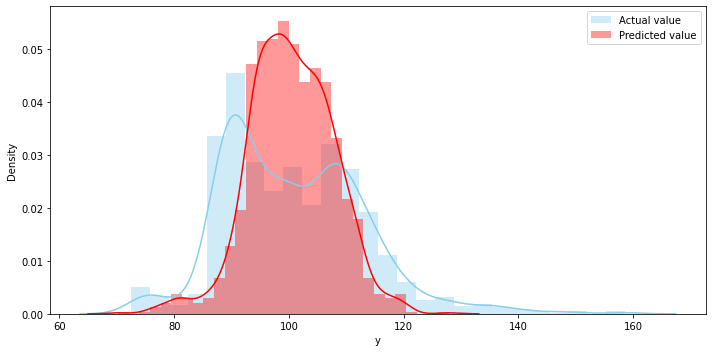

In [22]:
pred_test_y = model.predict(test_x)

plt.figure(figsize=(10,5))

sns.distplot(test_y[test_y<160], color="skyblue", label="Actual value")
sns.distplot(pred_test_y[pred_test_y<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

## Prediction on test data set using XGBoost

In [23]:
test_df.shape

(4209, 365)

In [24]:
test_df.isnull().sum().any()

False

In [25]:
test_df_feature = test_df.drop(columns={'ID'})
print(test_df_feature.shape)

(4209, 364)


In [26]:
C=test_df_feature.select_dtypes(np.object).columns
for i in A:
    C=test_df_feature[i].unique()
    B=pd.DataFrame(C).reset_index().drop('index', axis=1)
    print('Number of Unique values in the object datatype column', format(i),'is', B[0].count())

Number of Unique values in the object datatype column X0 is 49
Number of Unique values in the object datatype column X1 is 27
Number of Unique values in the object datatype column X2 is 45
Number of Unique values in the object datatype column X3 is 7
Number of Unique values in the object datatype column X4 is 4
Number of Unique values in the object datatype column X5 is 32
Number of Unique values in the object datatype column X6 is 12
Number of Unique values in the object datatype column X8 is 25


In [27]:
# Performing Label Encoding

test_df_feature['X0'] = le.fit_transform(test_df_feature.X0)
test_df_feature['X1'] = le.fit_transform(test_df_feature.X1)
test_df_feature['X2'] = le.fit_transform(test_df_feature.X2)
test_df_feature['X3'] = le.fit_transform(test_df_feature.X3)
test_df_feature['X4'] = le.fit_transform(test_df_feature.X4)
test_df_feature['X5'] = le.fit_transform(test_df_feature.X5)
test_df_feature['X6'] = le.fit_transform(test_df_feature.X6)
test_df_feature['X8'] = le.fit_transform(test_df_feature.X8)


In [28]:
pca.fit(test_df_feature)


PCA(n_components=0.95)

In [29]:
test_df_feature_trans = pca.fit_transform(test_df_feature)
print('Number of Rows and Columns in Testing Dataset after Performing dimensionality reduction:', test_df_feature_trans.shape)

Number of Rows and Columns in Testing Dataset after Performing dimensionality reduction: (4209, 6)


In [30]:
test_pred = model.predict(test_df_feature_trans)
test_pred

array([ 80.20003 ,  92.969574, 101.64637 , ...,  95.79453 , 110.24724 ,
        98.970345], dtype=float32)

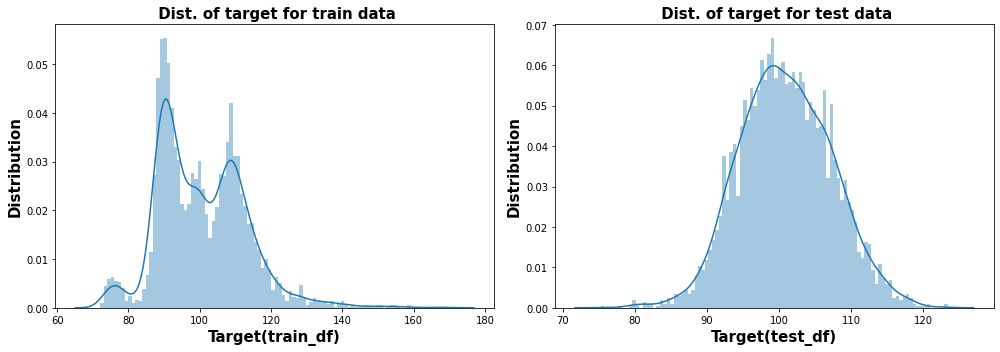

In [31]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_df_target[train_df_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_df)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_df)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()